<center><h1  style="color:white; background-color:#000000; border-radius: 0px; padding:25px;"> Rules extraction </h1></center>

This notebook illustrates rules extraction from decision trees.

In [1]:
import os
import sys
sys.path.insert(1, os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
import time

import numpy as np

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score, accuracy_score,roc_auc_score

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from pysirus.models.extractors import SirusDTreeClassifier,SirusRFClassifier,SirusGBClassifier

In [4]:
np.zeros((1,2))

array([[0., 0.]])

In [5]:
from sklearn import tree

## Load data :

In [6]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Single tree : 

In [9]:
# Usual DecisionTree
clf_dtree = DecisionTreeClassifier(max_depth=10, random_state=0)
clf_dtree.fit(X_train, y_train)
y_pred_dtree = clf_dtree.predict(X_test)
y_pred_proba_dtree = clf_dtree.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))

PR AUC : 0.9546052631578946
ROC AUC : 0.980263157894737
Accuracy : 0.9736842105263158


In [10]:
## DecisionTree rules extraction
STree = SirusDTreeClassifier(max_depth=2, random_state=0)
STree.fit(X_train,y_train,quantile=10)
y_pred_sirus = STree.predict(X_test)
y_pred_proba_sirus = STree.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_sirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_sirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_sirus))

PR AUC : 0.9163432355967078
ROC AUC : 0.9802631578947368
Accuracy : 0.9473684210526315


In [11]:
STree.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
STree.print_rules(max_rules=3)

########
Rules 0 
       &( petal length <= 4.8999998569488525 )
########
Rules 1 
       &( petal width <= 0.7699999958276749 )
########
Rules 2 
       &( petal width > 0.7699999958276749 )
       &( petal length <= 4.8999998569488525 )


In [12]:
STree.show_rules(max_rules=16)

Estimated average rate for target class 1 (from 'else' clauses) p_s = 19%.
(Note: True average rate should be P(Class=1) from training data).

IF Condition                                     THEN P(C1)      ELSE P(C1)
---------------------------------------------------------------------------
if   petal length <= 4.90                   then 44%          else 7%          
if   petal width <= 0.77                    then 0%           else 45%         
if   petal width > 0.77 & petal length <= 4.90 then 94%          else 4%          


In [13]:
STree.n_features_in_

4

## Random forest : 

In [14]:
# Usual RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=10, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred_dtree = clf_rf.predict(X_test)
y_pred_proba_dtree = clf_rf.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))

PR AUC : 0.9780937683715462
ROC AUC : 0.996191135734072
Accuracy : 0.9736842105263158


In [15]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(max_depth=2, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X_train,y_train,quantile=10,batch_size_post_treatment=50,p0=0.01)
end = time.time()
y_pred_sirus = RFSirus.predict(X_test)
y_pred_proba_sirus = RFSirus.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_sirus))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_sirus,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_sirus))
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

PR AUC : 0.9786189784555798
ROC AUC : 0.9844182825484765
Accuracy : 0.9210526315789473
Fitting time =  0.0668642520904541 s


In [16]:
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']

In [17]:
RFSirus.print_rules(max_rules=10)

########
Rules 0 
       &( petal width <= 0.4000000059604645 )
########
Rules 1 
       &( petal width <= 1.5 )
########
Rules 2 
       &( petal length <= 4.699999809265137 )
########
Rules 3 
       &( petal length <= 1.6299999952316284 )
########
Rules 4 
       &( petal width <= 1.7999999523162842 )
########
Rules 5 
       &( petal length > 1.6299999952316284 )
       &( petal width > 1.5 )
########
Rules 6 
       &( petal length > 1.6299999952316284 )
       &( petal width <= 1.5 )
########
Rules 7 
       &( sepal length <= 5.599999904632568 )
########
Rules 8 
       &( sepal length <= 6.159999847412109 )
########
Rules 9 
       &( petal length <= 5.099999904632568 )


## GB :

In [18]:
# Usual GradientBoostingClassifier
GBSirus = GradientBoostingClassifier(n_estimators=100,max_depth=2,random_state=19)
GBSirus.fit(X_train, y_train)
y_pred_dtree = GBSirus.predict(X_test)
y_pred_proba_dtree = GBSirus.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))

PR AUC : 0.9780937683715463
ROC AUC : 0.996191135734072
Accuracy : 0.9736842105263158


In [27]:
# GradientBoostingClassifier rules extraction
GBSirus = SirusGBClassifier(n_estimators=100,max_depth=2, random_state=19,splitter="quantile")
GBSirus.fit(X_train, y_train,p0=0.01,quantile=20)
y_pred_dtree = GBSirus.predict(X_test)
y_pred_proba_dtree = GBSirus.predict_proba(X_test)
print('PR AUC :', average_precision_score(y_test, y_pred_proba_dtree))
print('ROC AUC :', roc_auc_score(y_test, y_pred_proba_dtree,average='micro',multi_class='ovr'))
print('Accuracy :', accuracy_score(y_test, y_pred_dtree))

PR AUC : 0.9654311528620262
ROC AUC : 0.9241689750692521
Accuracy : 0.6842105263157895


In [28]:
len(GBSirus.all_possible_rules_list)

16

In [29]:
len(GBSirus.list_probas_by_rules)

16

In [30]:
GBSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
GBSirus.show_rules(max_rules=16)

Estimated average rate for target class 1 (from 'else' clauses) p_s = 24%.
(Note: True average rate should be P(Class=1) from training data).

IF Condition                                    THEN P(C1)      ELSE P(C1)
--------------------------------------------------------------------------
if   sepal width <= 2.70                   then 59%          else 21%         
if   petal width <= 1.14                   then 18%          else 39%         
if   petal width <= 1.14 & sepal width > 2.70 then 0%           else 45%         
if   petal length <= 1.50                  then 0%           else 40%         
if   sepal width <= 3.10                   then 47%          else 12%         
if   petal length <= 4.70                  then 42%          else 13%         
if   petal length <= 5.48                  then 38%          else 0%          
if   petal width <= 1.50                   then 43%          else 9%          
if   petal width <= 0.20                   then 0%           else 40%   

In [31]:
GBSirus.print_rules(max_rules=10)

########
Rules 0 
       &( sepal width <= 2.700000047683716 )
########
Rules 1 
       &( petal width <= 1.1399999856948853 )
########
Rules 2 
       &( petal width <= 1.1399999856948853 )
       &( sepal width > 2.700000047683716 )
########
Rules 3 
       &( petal length <= 1.5 )
########
Rules 4 
       &( sepal width <= 3.0999999046325684 )
########
Rules 5 
       &( petal length <= 4.699999809265137 )
########
Rules 6 
       &( petal length <= 5.480000019073486 )
########
Rules 7 
       &( petal width <= 1.5 )
########
Rules 8 
       &( petal width <= 0.20000000298023224 )
########
Rules 9 
       &( petal length <= 3.9000000953674316 )


# Tests : 

## Essais :

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
y[y==1] = -1
y[y==2] = -1
y[y==0] = 1
y[y==-1]=0
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
y.sum()

50

## Essais 2:

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
n_rules before post-treatment :  6
25 all_possible_rules_list :  [[(2, 1.7000000476837158, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'L')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'R')], [(2, 1.7000000476837158, 'R')], [(3, 0.4000000059604645, 'L')], [(3, 0.4000000059604645, 'R')]]
####################
25 proportions_count_sort :  [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
####################
**********************************************************************
Compared ruled paths_left:  [(2, 1.7000000476837158, 'L')]
Paths:  [(2, 1.7000000476837158, 'L')]
Path ftr:  []
**********************************************************************
Compared ruled pa

[Text(0.4, 0.8333333333333334, 'x[2] <= 1.7\ngini = 0.444\nsamples = 150\nvalue = [100, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.4\ngini = 0.038\nsamples = 102\nvalue = [100, 2]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 100\nvalue = [100, 0]')]

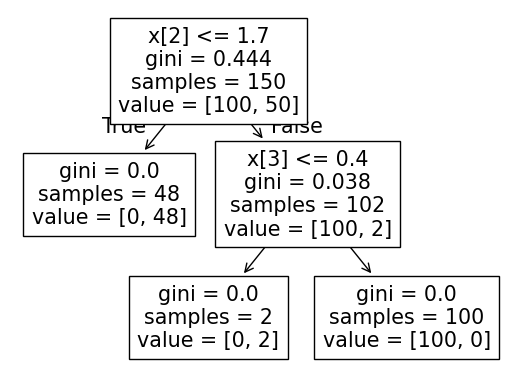

In [20]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=19,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)
tree.plot_tree(RFSirus.estimators_[0])

In [26]:
def implies(single_rule_a,single_rule_b):
        """""
        Check if single_rule_a implies single_rule_b.
        Args:
            single_rule_a (tuple): First single rule in the form (var, thr, dir).
            single_rule_b (tuple): Second single rule in the form (var, thr, dir).
        """""
        if single_rule_a[0] == single_rule_b[0]:
            if single_rule_a[2] == 'L':
                if single_rule_b[2] == 'L':
                    return single_rule_a[1] <= single_rule_b[1]
                else:
                    return False
            else:
                if single_rule_b[2] == 'R':
                    return single_rule_a[1] >= single_rule_b[1]
                else:
                    return False
        else:
            return False

In [27]:
implies(single_rule_a=(2, 1.7000000476837158, 'L'),single_rule_b=(2, 1.7000000476837158, 'L'))

True

In [28]:
implies(single_rule_a=(2, 1.7000000476837158, 'L'),single_rule_b=(3, 0.4000000059604645, 'L'))

False

In [38]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=4,max_depth=2,bootstrap=True, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

array_quantile :  [[4.3  2.   1.   0.1 ]
 [4.8  2.5  1.4  0.2 ]
 [5.   2.7  1.5  0.2 ]
 [5.27 2.8  1.7  0.4 ]
 [5.6  3.   3.9  1.16]
 [5.8  3.   4.35 1.3 ]
 [6.1  3.1  4.64 1.5 ]
 [6.3  3.2  5.   1.8 ]
 [6.52 3.4  5.32 1.9 ]
 [6.9  3.61 5.8  2.2 ]
 [7.9  4.4  6.9  2.5 ]]
n_rules before post-treatment :  30
25 all_possible_rules_list :  [[(2, 1.7000000476837158, 'R')], [(2, 1.7000000476837158, 'L')], [(3, 0.4000000059604645, 'R')], [(3, 0.4000000059604645, 'L')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'L')], [(3, 0.4000000059604645, 'R'), (2, 1.7000000476837158, 'R')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'R')], [(2, 1.7000000476837158, 'R'), (3, 0.4000000059604645, 'L')], [(2, 1.7000000476837158, 'R'), (0, 4.800000190734863, 'R')], [(0, 4.800000190734863, 'L')], [(0, 4.800000190734863, 'R')], [(2, 1.7000000476837158, 'R'), (0, 4.800000190734863, 'L')], [(3, 0.20000000298023224, 'R')], [(3, 0.20000000298023224, 'L')], [(2, 1.7000000476837158, 'R'), (3, 

## RF : 

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=4,max_depth=2,bootstrap=False, random_state=1,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')

In [ ]:
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

In [ ]:
tree.plot_tree(RFSirus.estimators_[0])

In [ ]:
tree.plot_tree(RFSirus.estimators_[800])

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,batch_size_post_treatment=50,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)
tree.plot_tree(RFSirus.estimators_[0])
tree.plot_tree(RFSirus.estimators_[0])

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=19,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)
tree.plot_tree(RFSirus.estimators_[0])

In [ ]:
## RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=19)
start = time.time()
RF.fit(X,y)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
tree.plot_tree(RF.estimators_[0])

In [ ]:
## RandomForestClassifier
RF = RandomForestClassifier(n_estimators=1,max_features=4,max_depth=2,bootstrap=False, random_state=0)
start = time.time()
RF.fit(X,y)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
tree.plot_tree(RF.estimators_[0])

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=2,max_depth=2,bootstrap=True, random_state=0,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=2,max_depth=2,bootstrap=True, random_state=19,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

## optimizing p0 :

In [ ]:
## RandomForestClassifier rules extraction
RFSirus = SirusRFClassifier(n_estimators=1000,max_features=4,max_depth=2,bootstrap=True, random_state=1,splitter="quantile")
start = time.time()
RFSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
RFSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
RFSirus.show_rules(max_rules=16)

In [ ]:
from pysirus.models.optimizer import train_optimal_extractor_p0
from sklearn.metrics import roc_auc_score

In [ ]:
final_sirus_model = train_optimal_extractor_p0(clf=RFSirus,X_train=X,y_train=y,
                           scoring=roc_auc_score,p0_exploration_grid=np.linspace(0.01, 0.05, 15),
                           n_cv_splits=5,n_cv_repeats=5)

In [ ]:
final_sirus_model

In [ ]:
final_sirus_model.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
final_sirus_model.show_rules(max_rules=16)

## GB : 

In [ ]:
## SirusGBClassifier rules extraction
GBSirus = SirusGBClassifier(n_estimators=100,max_depth=2, random_state=19,splitter="quantile")
start = time.time()
GBSirus.fit(X,y,quantile=10,p0=0.01)
end = time.time()
time_2 = end-start
print('Fitting time = ',time_2 ,'s')
#GBSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
#GBSirus.show_rules(max_rules=16)

In [ ]:
GBSirus.feature_names_in_ = ['sepal length','sepal width','petal length','petal width']
GBSirus.print_rules(max_rules=4)

In [ ]:
tree.plot_tree(GBSirus.estimators_[0,0])

In [ ]:
tree.plot_tree(GBSirus.estimators_[1,0])

In [ ]:
tree.plot_tree(GBSirus.estimators_[2,0])

In [ ]:
tree.plot_tree(GBSirus.estimators_[3,0])

In [ ]:
tree.plot_tree(GBSirus.estimators_[4,0])

In [ ]:
tree.plot_tree(GBSirus.estimators_[99,0])